In [23]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as morph
import skimage.io as imgio
%matplotlib inline

In [39]:
#a=plt.imread('/Users/data/WaterBB/water_sample_BB/water_bb_0000.tif')
a=imgio.imread('/Users/data/P08062_wood/raw_CCD/wood_0001.fits')
a=(a-a.min())/(a.max()-a.min())
plt.imshow(a)


ValueError: Could not load "" 
Reason: "cannot find loader for this FITS file"
Please see documentation at: http://pillow.readthedocs.org/en/latest/installation.html#external-libraries

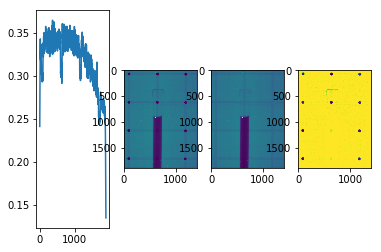

In [26]:
mask=np.copy(a)
maxval=mask.max();
mask[1:-2,1:-2]=maxval
plt.subplot(1,4,1); 
plt.plot(mask[:,0])
fh=morph.greyreconstruct.reconstruction(seed=mask,mask=a,method='erosion')
plt.subplot(1,4,2); 
plt.imshow(a)
plt.subplot(1,4,3)
plt.imshow(fh)
plt.subplot(1,4,4)
plt.imshow(a-fh)

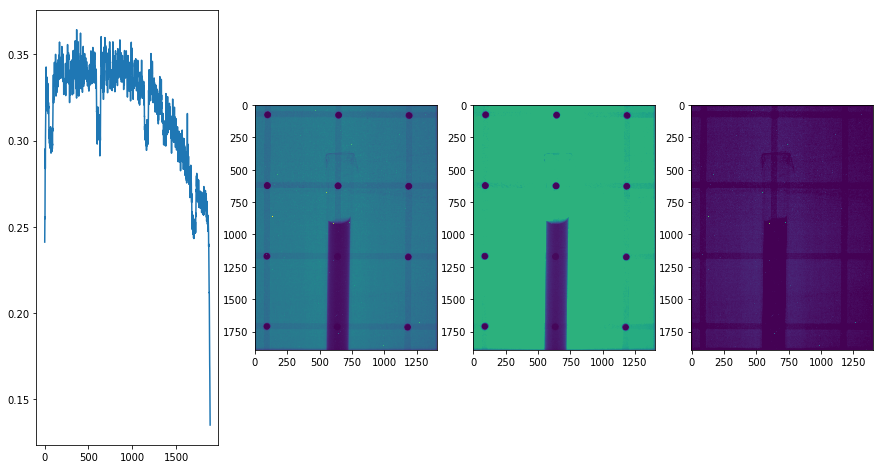

In [36]:
mask=np.copy(a)
minval=mask.min();
mask[1:-2,1:-2]=minval
plt.figure(figsize=[15,8])
plt.subplot(1,4,1); 
plt.plot(mask[:,0])
fh=morph.greyreconstruct.reconstruction(seed=mask,mask=a,method='dilation')

plt.subplot(1,4,2); 
plt.imshow(a)
plt.subplot(1,4,3)
plt.imshow(fh)
plt.subplot(1,4,4)
peakdiff=a-fh
plt.imshow(peakdiff)

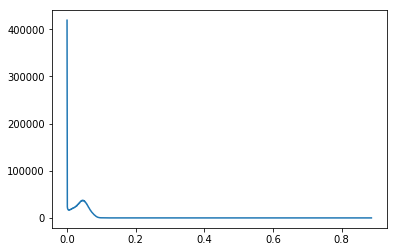

In [35]:
h,ax=np.histogram(peakdiff.ravel(),bins=1024)
plt.plot(ax[0:-1],h)

In [80]:
y,x = np.mgrid[:20:0.5,:20:0.5]
bumps=np.sin(x)+np.sin(y)

In [81]:
h=0.3
seed=bumps-h
background = morph.greyreconstruct.reconstruction(seed,bumps)

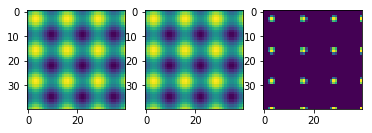

In [82]:
plt.subplot(1,3,1)
plt.imshow(bumps)
plt.subplot(1,3,2)
plt.imshow(seed)
plt.subplot(1,3,3)
plt.imshow(bumps-background)
